# Yet Another Regression Problem

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

## Load the Data

In [2]:
data = pickle.load(open('data2D.pickle', 'rb'))
data.shape

(26, 2)

## Calculate the Regression

In [3]:
h1 = lambda x: np.ones(len(x))
h2 = lambda x: np.sin(x)
h3 = lambda x: np.log(x + 0.0001)

In [4]:
H = np.stack([h1(data[:, 0]), h2(data[:, 0]), h3(data[:, 0])], axis=1)
H

array([[ 1.        ,  0.54002176, -0.56113175],
       [ 1.        ,  0.99022116,  0.35832691],
       [ 1.        ,  0.55566838, -0.52887645],
       [ 1.        ,  0.93411055,  0.66058955],
       [ 1.        ,  0.85143861,  0.75281623],
       [ 1.        ,  0.35610157,  1.02158725],
       [ 1.        ,  0.02742255,  1.1359937 ],
       [ 1.        , -0.73991526,  1.37993343],
       [ 1.        , -0.9988624 ,  1.56028813],
       [ 1.        , -0.33797023,  1.78146094],
       [ 1.        , -0.13857129,  1.8155194 ],
       [ 1.        , -0.06415973,  1.82762222],
       [ 1.        ,  0.99795979,  2.05286558],
       [ 1.        ,  0.61476878,  2.1705138 ],
       [ 1.        , -0.32328942,  2.27768581],
       [ 1.        , -0.85275663,  2.34623048],
       [ 1.        , -0.58790195,  2.30790499],
       [ 1.        ,  0.57215375,  1.9304215 ],
       [ 1.        ,  0.8804081 ,  1.99606094],
       [ 1.        ,  0.94640186,  2.10205521],
       [ 1.        ,  0.91961245,  2.111

In [5]:
weights = np.matmul(np.linalg.pinv(H), data[:, 1])
weights

array([3.2334685 , 1.73280454, 2.49649192])

In [6]:
error = np.linalg.norm(data[:, 1] - np.matmul(H, weights))**2
error

40.63188715287524

In [7]:
def func_reg(x):
    H = np.array([h1(x), h2(x), h3(x)]).transpose()
    
    return np.matmul(H, weights)

## Plot the Result

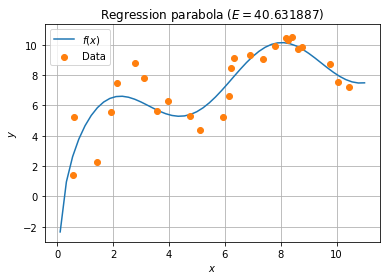

In [8]:
x = np.linspace(0.1, 11)
plt.plot(x, func_reg(x), label='$f(x)$')
plt.scatter(data[:, 0], data[:, 1], c='C1', zorder=3, label='Data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Regression parabola ($E = %f$)' % error)
plt.grid()
plt.legend();